In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import eigh

from klap import (
    rbf_kernel,
    rbf_laplacian,
    exp_kernel,
    exp_laplacian
)


np.random.seed(100)

In [2]:
n = 10000
p = 500

# # Learn cosines
# x = np.random.rand(n, 1) * 2 - 1
# Learn Hermite
x = np.random.randn(n, 1) * np.sqrt(.1)
x_repr = x[:p]

sigma = 1
kernel = exp_kernel

K = kernel(x_repr, x, sigma=sigma)
L = exp_laplacian(x_repr, x, sigma=sigma, K=K)
R = K @ K.T
L /= n
R /= n

In [3]:
error = eigh(L, eigvals_only=True, subset_by_index=[0,0])[0]
if error < 0:
    reg = error * 1.1
if error > 0:
    reg = 1e-7
w, v = eigh(R, L + reg * np.eye(len(L)), subset_by_index=[len(L)-16, len(L)-1])

In [4]:
x_test = np.linspace(-.75, .75, num=1000)
k_test = kernel(x_test[:, np.newaxis], x_repr, sigma=sigma)
y_test = k_test @ v
y_test /= np.sqrt(np.mean(y_test**2, axis=0))


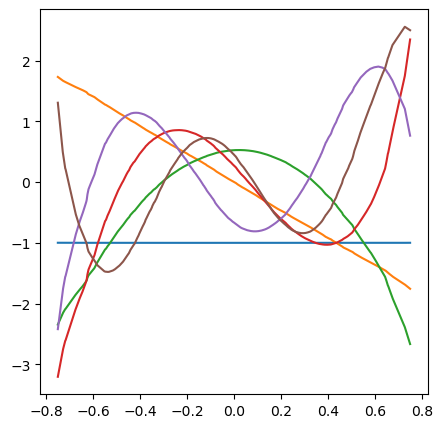

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in range(6):
    ax.plot(x_test, y_test[:,-i-1])

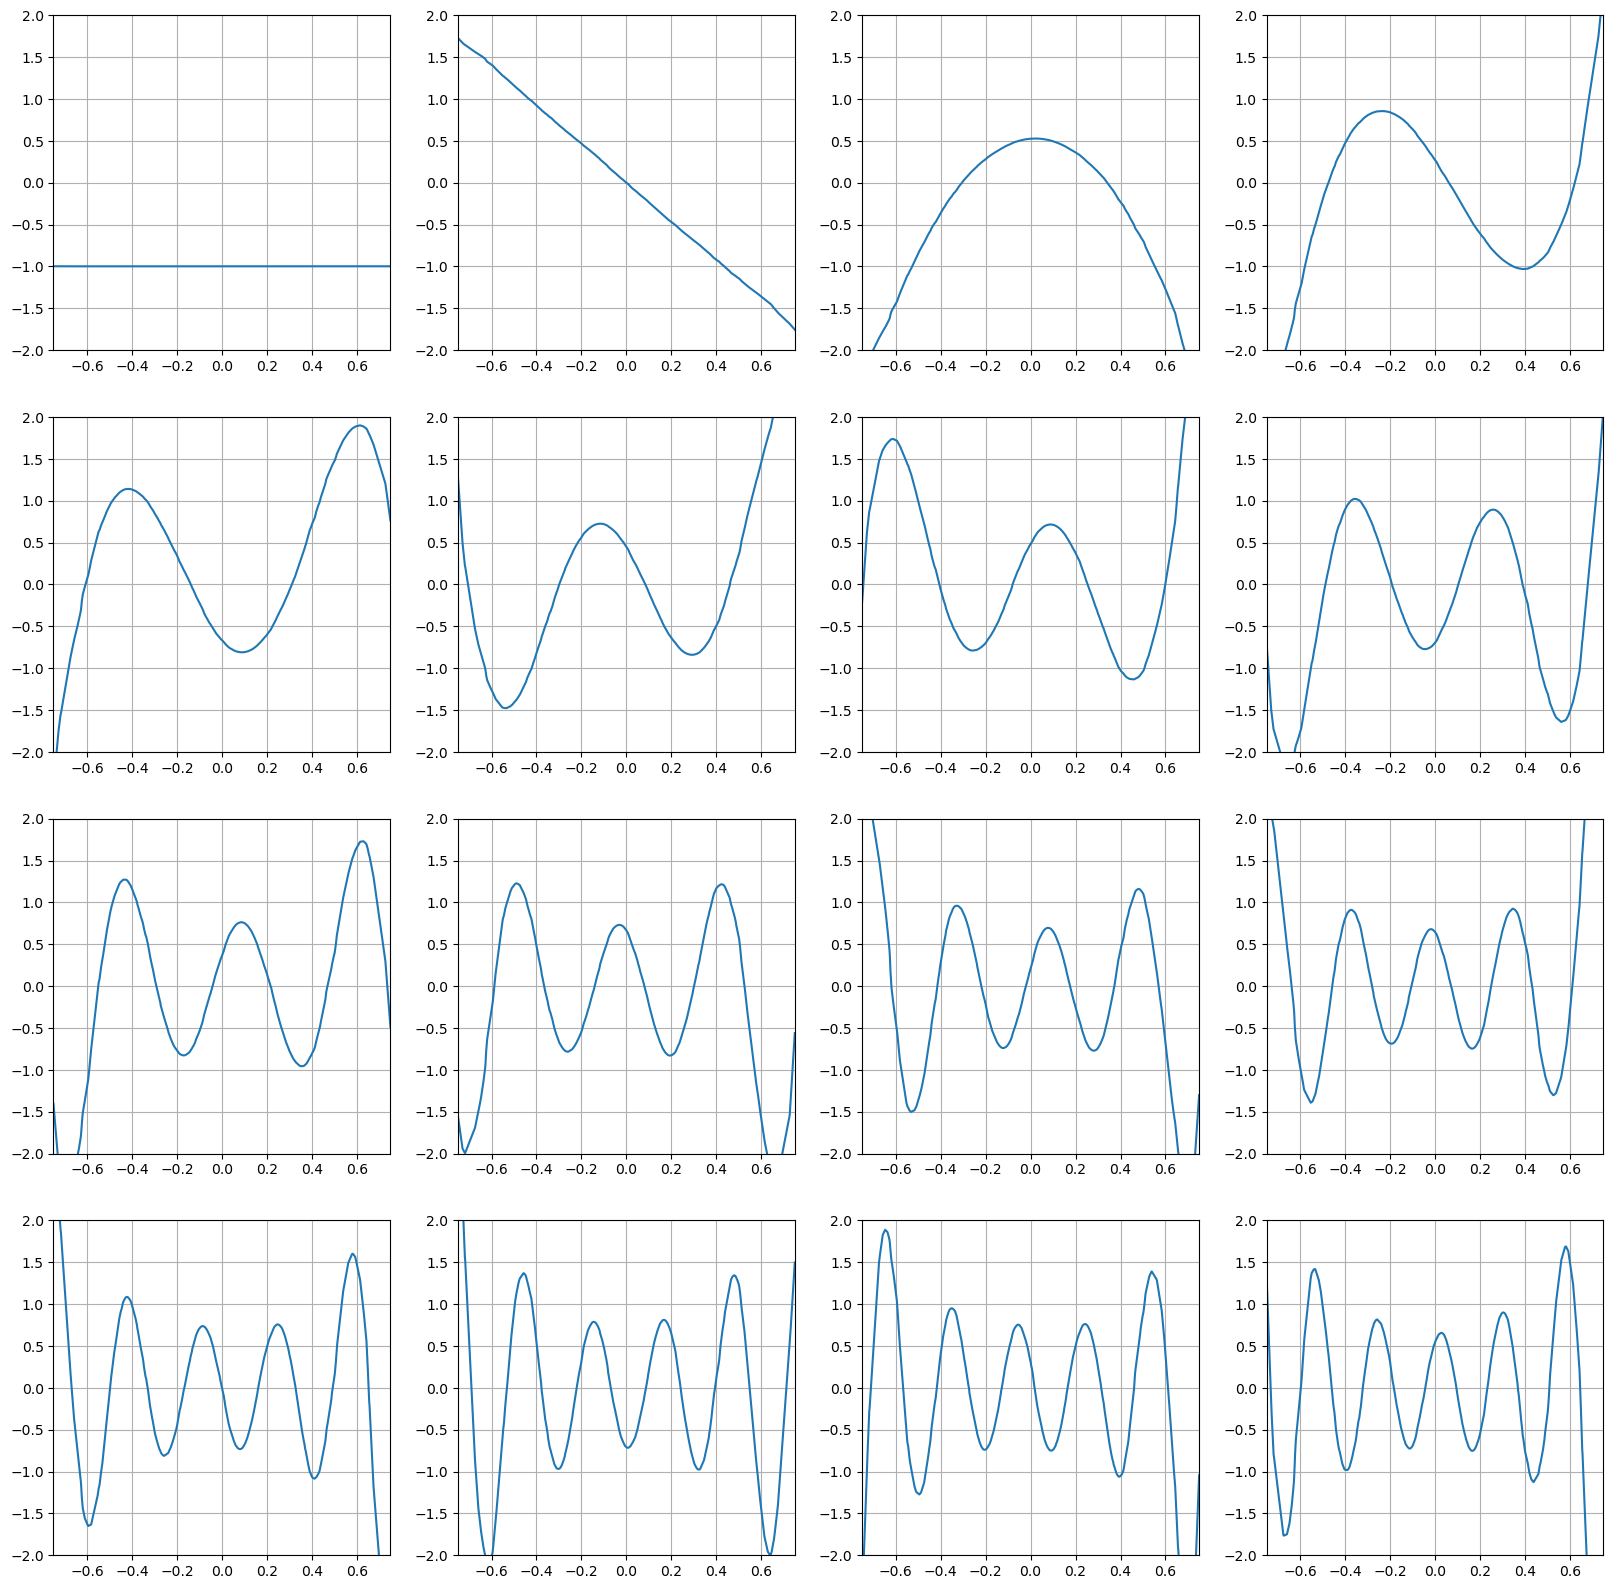

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i in range(16):
    axes[i//4, i%4].plot(x_test, y_test[:, -i-1], color='C0')
    axes[i//4, i%4].grid(True)
    axes[i//4, i%4].set_xlim(-.75, .75)
    axes[i//4, i%4].set_ylim(-2, 2)